In [165]:
# Predicting the stock price of BHP using machine learning algorithms 

In [166]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
scaler=MinMaxScaler(feature_range=(0,1))
import tensorflow as tf

In [167]:
stk = input("Enter a stock key: ")

Enter a stock key: AAPL


In [168]:
# Load Data
df = pdr.get_data_tiingo(stk, api_key = "f6f8734d3bebb780fd5c4f3dbff2c30e2aa21c8e")
df.to_csv('stock_data.csv')
df = pd.read_csv('stock_data.csv')

/Users/arshpolra/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [192]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-15 00:00:00+00:00,115.82,116.73,115.230,115.380,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
1,AAPL,2016-12-16 00:00:00+00:00,115.97,116.50,115.645,116.470,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0
2,AAPL,2016-12-19 00:00:00+00:00,116.64,117.38,115.750,115.800,27779423,27.444482,27.618598,27.235072,27.246836,111117692,0.0,1.0
3,AAPL,2016-12-20 00:00:00+00:00,116.95,117.50,116.680,116.740,21424965,27.517422,27.646833,27.453893,27.468011,85699860,0.0,1.0
4,AAPL,2016-12-21 00:00:00+00:00,117.06,117.40,116.780,116.800,23783165,27.543305,27.623304,27.477423,27.482129,95132660,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2021-12-07 00:00:00+00:00,171.18,171.58,168.340,169.080,120405352,171.180000,171.580000,168.340000,169.080000,120405352,0.0,1.0
1253,AAPL,2021-12-08 00:00:00+00:00,175.08,175.96,170.700,172.125,116998901,175.080000,175.960000,170.700000,172.125000,116998901,0.0,1.0
1254,AAPL,2021-12-09 00:00:00+00:00,174.56,176.75,173.920,174.910,108923739,174.560000,176.750000,173.920000,174.910000,108923739,0.0,1.0
1255,AAPL,2021-12-10 00:00:00+00:00,179.45,179.63,174.690,175.205,115402731,179.450000,179.630000,174.690000,175.205000,115402731,0.0,1.0


In [191]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-12-07 00:00:00+00:00,171.18,171.58,168.34,169.080,120405352,171.18,171.58,168.34,169.080,120405352,0.0,1.0
1253,AAPL,2021-12-08 00:00:00+00:00,175.08,175.96,170.70,172.125,116998901,175.08,175.96,170.70,172.125,116998901,0.0,1.0
1254,AAPL,2021-12-09 00:00:00+00:00,174.56,176.75,173.92,174.910,108923739,174.56,176.75,173.92,174.910,108923739,0.0,1.0
1255,AAPL,2021-12-10 00:00:00+00:00,179.45,179.63,174.69,175.205,115402731,179.45,179.63,174.69,175.205,115402731,0.0,1.0
1256,AAPL,2021-12-13 00:00:00+00:00,175.74,182.13,175.53,181.115,153237019,175.74,182.13,175.53,181.115,153237019,0.0,1.0


In [169]:
df1=df.reset_index()['close']
# plt.plot(df1)
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.02249217]
 [0.02286788]
 [0.02454602]
 ...
 [0.16961803]
 [0.181866  ]
 [0.17257358]]


In [171]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 440)

In [172]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [173]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [174]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [175]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 245ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 2/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0044 - val_loss: 0.0263
Epoch 3/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0026 - val_loss: 0.0190
Epoch 4/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0011 - val_loss: 0.0220
Epoch 5/100
12/12 [==============================] - 2s 178ms/step - loss: 8.9773e-04 - val_loss: 0.0218
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 9.4754e-04 - val_loss: 0.0198
Epoch 7/100
12/12 [==============================] - 1s 126ms/step - loss: 8.4915e-04 - val_loss: 0.0220
Epoch 8/100
12/12 [==============================] - 2s 126ms/step - loss: 9.1974e-04 - val_loss: 0.0213
Epoch 9/100
12/12 [==============================] - 2s 151ms/step - loss: 6.8847e-04 - val_loss: 0.0191
Epoch 10/100
12/12 [==============================] - 2s 197ms/step - l

12/12 [==============================] - 2s 133ms/step - loss: 3.0041e-04 - val_loss: 0.0075
Epoch 79/100
12/12 [==============================] - 2s 147ms/step - loss: 3.0522e-04 - val_loss: 0.0083
Epoch 80/100
12/12 [==============================] - 2s 136ms/step - loss: 2.7097e-04 - val_loss: 0.0076
Epoch 81/100
12/12 [==============================] - 2s 138ms/step - loss: 2.6723e-04 - val_loss: 0.0077
Epoch 82/100
12/12 [==============================] - 1s 126ms/step - loss: 2.4918e-04 - val_loss: 0.0075
Epoch 83/100
12/12 [==============================] - 2s 128ms/step - loss: 2.6690e-04 - val_loss: 0.0077
Epoch 84/100
12/12 [==============================] - 2s 133ms/step - loss: 2.4549e-04 - val_loss: 0.0073
Epoch 85/100
12/12 [==============================] - 2s 129ms/step - loss: 2.5821e-04 - val_loss: 0.0076
Epoch 86/100
12/12 [==============================] - 2s 130ms/step - loss: 2.5590e-04 - val_loss: 0.0071
Epoch 87/100
12/12 [==============================] - 2s 13

In [176]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [177]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [178]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


202.95916019394107

In [179]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

167.13386010411986

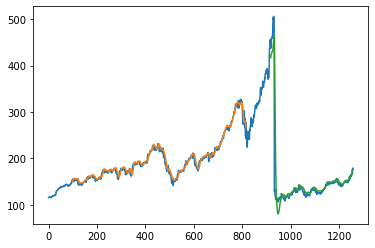

In [180]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [181]:
len(test_data)

440

In [182]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [183]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [184]:
temp_input

[0.10449592986850342,
 0.1055729492798998,
 0.10001252348152784,
 0.0955291170945522,
 0.09718221665623034,
 0.0977332498434565,
 0.09688165309956165,
 0.10149029430181589,
 0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,

In [185]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16938855]
101
1 day input [0.10557295 0.10001252 0.09552912 0.09718222 0.09773325 0.09688165
 0.10149029 0.10046337 0.10073889 0.09843456 0.09830933 0.09708203
 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856
 0.09983719 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114
 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289
 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386
 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.

8 day output [[0.18812758]]
9 day input [0.10073889 0.09843456 0.09830933 0.09708203 0.09773325 0.10532248
 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719 0.10356919
 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735
 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269
 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128
 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731
 0.1377583  0.14647464 

17 day output [[0.20102865]]
18 day input [0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866   0.17257358 0.16938855 0.17387746
 0.17726031 0.179813

25 day output [[0.21283036]]
26 day input [0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16938855 0.17387746 0.17726031 0.17981352
 0.18183993 0.18356979 0.18514839 0.18665503 0.18812758 0.1895823
 0.1910253  0.19245973

In [186]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1257

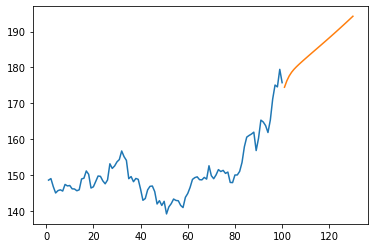

In [187]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

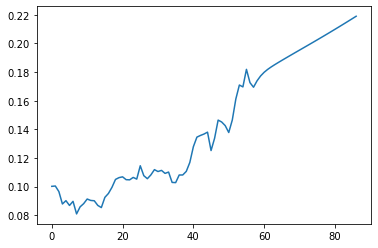

In [188]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

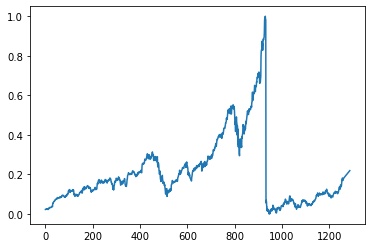

In [189]:
plt.plot(df3)